In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_test='/content/drive/My Drive/bv'
categories=['dme','norm']
training = []

def create():
    for cat in categories:
        path = os.path.join(path_test, cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (224, 224))
            training.append([new_array, class_num])

create()


count1=0
count2=0
for i in range(len(training)):
    if training[i][1]==0:
        count1=count1+1
    elif training[i][1]==1:
        count2=count2+1

print(count1,count2)

Mounted at /content/drive
94 100


In [ ]:
import random
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:


np.random.shuffle(training)
X = []
y = []

for features, label in training:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 224, 224, 3)
X = X.astype('float32') / 255.0
Y = to_categorical(y, 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Fixing the learning rate to 3e-4
optimizer = Adam(learning_rate=3e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2, validation_data=(X_test, y_test))
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# Classification Report
y_pred = np.argmax(model.predict(X_test), axis=1)


Epoch 1/50
5/5 - 29s - loss: 0.6674 - accuracy: 0.5484 - val_loss: 0.7488 - val_accuracy: 0.4872 - 29s/epoch - 6s/step
Epoch 2/50
5/5 - 1s - loss: 0.7238 - accuracy: 0.6387 - val_loss: 0.5822 - val_accuracy: 0.6923 - 973ms/epoch - 195ms/step
Epoch 3/50
5/5 - 1s - loss: 0.6107 - accuracy: 0.5677 - val_loss: 0.6404 - val_accuracy: 0.5641 - 1s/epoch - 210ms/step
Epoch 4/50
5/5 - 1s - loss: 0.6057 - accuracy: 0.6065 - val_loss: 0.5970 - val_accuracy: 0.6410 - 1s/epoch - 202ms/step
Epoch 5/50
5/5 - 1s - loss: 0.4976 - accuracy: 0.7871 - val_loss: 0.5533 - val_accuracy: 0.7949 - 1s/epoch - 210ms/step
Epoch 6/50
5/5 - 1s - loss: 0.5023 - accuracy: 0.7871 - val_loss: 0.6237 - val_accuracy: 0.7436 - 1s/epoch - 207ms/step
Epoch 7/50
5/5 - 1s - loss: 0.3902 - accuracy: 0.8387 - val_loss: 0.5405 - val_accuracy: 0.7179 - 1s/epoch - 208ms/step
Epoch 8/50
5/5 - 1s - loss: 0.3426 - accuracy: 0.8710 - val_loss: 0.6014 - val_accuracy: 0.8205 - 1s/epoch - 207ms/step
Epoch 9/50
5/5 - 1s - loss: 0.2644 - a

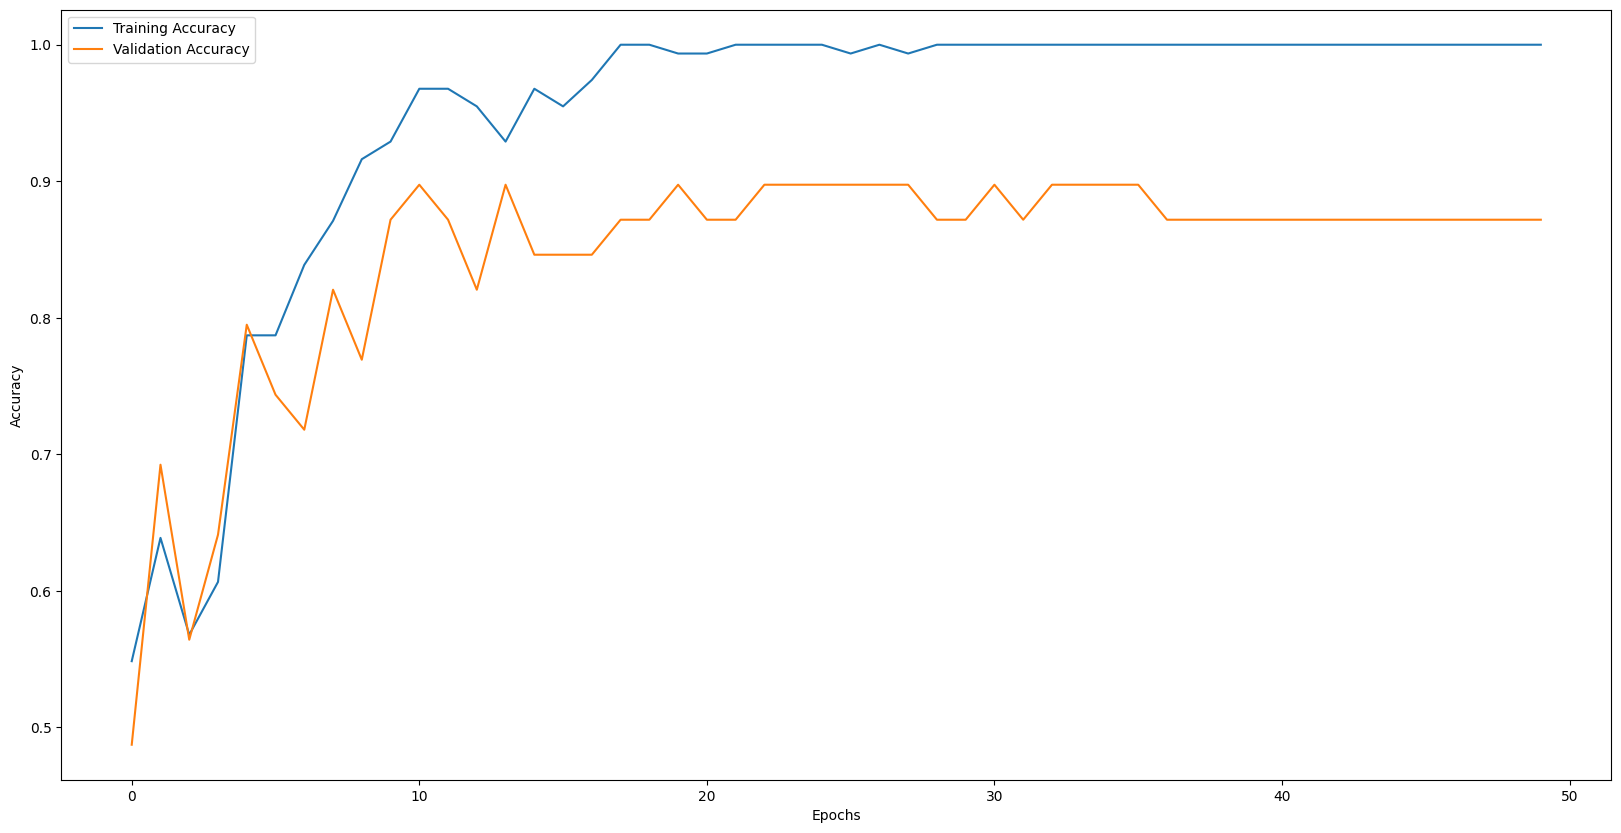

In [ ]:
plt.figure(figsize=(20,10))
# Plotting accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[15  3]
 [ 2 19]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.86      0.90      0.88        21

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39

